In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

def get_data():
    df = pd.read_csv('ecommerce_data.csv') # Df = Data Frames    
    data = df.as_matrix()
    
    # Split The Data
    X = data[:, :-1]
    Y = data[:, -1]
    
    # Normalize numerical columns
    X[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
    X[:, 2] = (X[:, 2] - X[:, 2].mean()) / X[:, 2].std()
    
    # Categorical Data ( Time 1 | 2 | 3 | 4 )
    N, D = X.shape
    X2 = np.zeros((N, D+3))
    X2[:, 0:(D-1)] = X[:, 0:(D-1)]
    
    for n in range(N):
        t = int(X[n, D-1])
        X2[n, t+D-1] = 1
    
    return X2, Y

def get_binary_data():
    X, Y = get_data()
    X2 = X[Y <= 1]
    Y2 = Y[Y <= 1]
    return X2, Y2

In [19]:
X, Y = get_binary_data()
X, Y = shuffle(X, Y)

D = X.shape[1]
W = np.random.randn(D)
b = 0

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [22]:
Xtrain = X[:-100]
Ytrain = Y[:-100]

Xtest = X[-100:]
Ytest = Y[-100:]

In [23]:
def forward(X, W, b):
    return sigmoid(X.dot(W) + b)

In [24]:
def classification_rate(Y, P):
    return np.mean(Y == P)

In [25]:
def cross_entropy(T, pY):
    return -np.mean(T*np.log(pY) + (1 - T)*np.log(1 - pY))

In [26]:
train_costs = []
test_costs = []
learning_rate = .001

In [27]:
for i in range(10000):
    pYtrain = forward(Xtrain, W, b)
    pYtest = forward(Xtest, W, b)
    
    ctrain = cross_entropy(Ytrain, pYtrain)
    ctest = cross_entropy(Ytest, pYtest)
    
    train_costs.append(ctrain)
    test_costs.append(ctest)
    
    # Gradient Descent
    
    W -= learning_rate * Xtrain.T.dot(pYtrain - Ytrain)
    b -= learning_rate * (pYtrain - Ytrain).sum()
    
    if(1 % 1000 == 0):
        print(i, ctrain, ctest)
        
print("Final train Classification rate", classification_rate(Ytrain, np.round(pYtrain)))
print("Final test classification rate", classification_rate(Ytest, np.round(pYtest)))

Final train Classification rate 0.979865771812
Final test classification rate 0.95


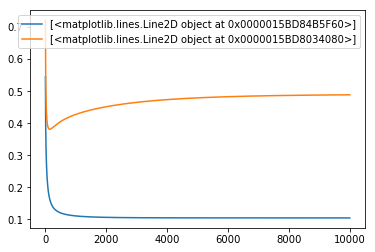

In [28]:
# Plot the cost

legend1 = plt.plot(train_costs, label="train costs")
legend2 = plt.plot(test_costs, label="test costs")
plt.legend([legend1, legend2])
plt.show()

In [29]:
df = pd.read_csv('ecommerce_data.csv') # Df = Data Frames    

In [30]:
df.head()

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,0,0.657510,0,3,0
1,1,1,0.568571,0,2,1
2,1,0,0.042246,1,1,0
3,1,1,1.659793,1,1,2
4,0,1,2.014745,1,1,2
